In [1]:
import numpy as np
import mdtraj as md
import matplotlib.pyplot as plt
import nglview as nv

# # # Path: pymdna/__init__.py, prototype of the package and atomic is not properly referenced in the package at genertors.py now I just explicitly define the path loction
# # import pymdna as mdna
import sys
sys.path.append('/Users/thor/surfdrive/Projects/pymdna/')
import pymdna as mdna 
%load_ext autoreload
%autoreload 2

joblib is not installed. Falling back to sequential computation.


/Users/thor/surfdrive/Projects/PMCpy/pmcpy/Evals/PyLk/pylk/writhemap.py:16: UserWarning: Cython version of writhemap (PyLk) not compiled. Defaulting to numba implementation. Consider compiling the cython version.
  warnings.warn(
/Users/thor/surfdrive/Projects/PMCpy/pmcpy/Evals/PyLk/pylk/eval_link.py:10: UserWarning: Cython version of linkingnumber (PyLk) not compiled. Defaulting to numba implementation. Consider compiling the cython version.
  warnings.warn(


Random sequence: CGGTTGGTCGTCTACCTTCTAGAAACTGGCATGGGCCAAG 


Start rescaling spline based on requested number of base pairs.
	This requires recomputation of the control points to match the desired number of base pairs.
	Spline scaled to match the target number of base pairs: 40

Structure is requested to be circular:
	Excess twist per base to make ends meet: 1.71 degrees
	New twist angle per base pair: 36.0 

Adjusting twist angles to match the given Delta linking number: 5
	Current twist number: 4.00
	Old twist angle per base pair: 36.00 degrees
	Adjusted twist angle per base pair: 81.00 degrees



TypeError: Nucleic.minimize() got an unexpected keyword argument 'temp'

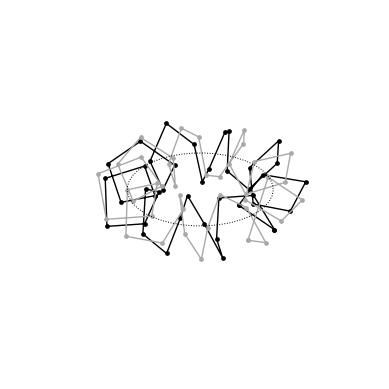

In [14]:
shape = mdna.Shapes.circle(10)
nuc = mdna.make(control_points=shape,n_bp=40,closed=True,dLk=5)
nuc.draw()
nuc.minimize(equilibrate_writhe=False,simple=True,exvol_rad=0, temperature==300)
nuc.draw()

In [5]:
pdb = mdna.sequence_to_pdb('CAT')


Start rescaling spline based on requested number of base pairs.
	This requires recomputation of the control points to match the desired number of base pairs.
	Spline scaled to match the target number of base pairs: 3



In [6]:
traj = mdna.sequence_to_md('CAT')


Start rescaling spline based on requested number of base pairs.
	This requires recomputation of the control points to match the desired number of base pairs.
	Spline scaled to match the target number of base pairs: 3

Initialize DNA openMM simulation at 310 K for 100 ps time units
Minimize energy
Run simulation for 50000 steps
Simulation completed
Saved trajectory as: ./CAT.h5


(500, 3)

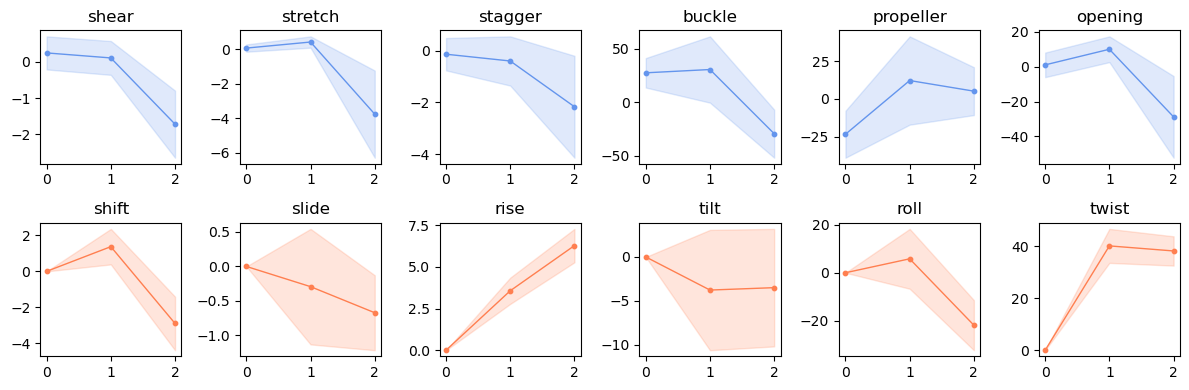

In [8]:
nuc = mdna.compute_rigid_parameters(traj)
_ = nuc.plot_parameters()
twist = nuc.get_parameter('twist')
twist.shape

In [9]:
path  = '/Users/thor/surfdrive/Data/h-ns/BacterialChromatin/FI_simulations/0_k/8_Haff/' #0_3GC'
i =0
traj = md.load(path+f'dry_{i}_run.xtc', top=path+f'dry_{i}_run.pdb',stride=10).remove_solvent()
traj = traj.atom_slice(traj.top.select('not protein'))
traj = traj.superpose(traj,0)
traj
nuc = mdna.compute_rigid_parameters(traj)


(2001, 12)

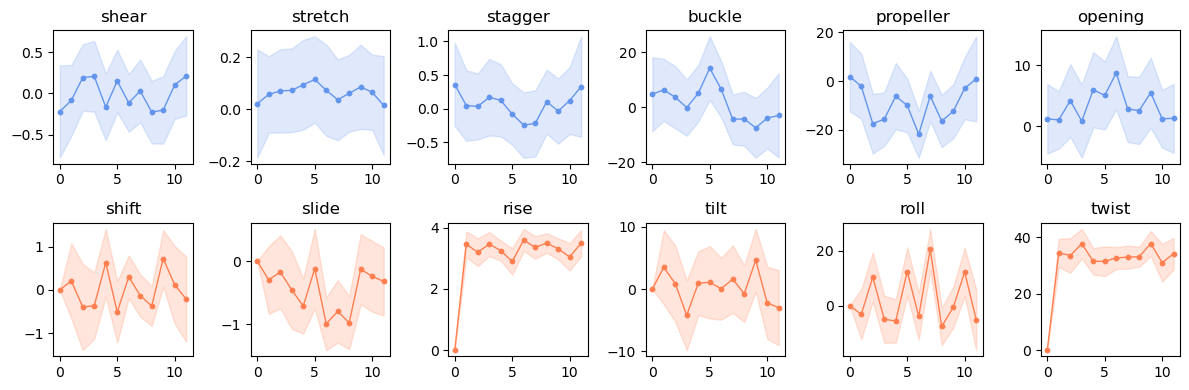

In [10]:
_ = nuc.plot_parameters()
twist = nuc.get_parameter('twist')
twist.shape

#### Test with mdtraj 

In [ ]:
mdna.make(sequence, control_points, nbp, closed)

DNA structure with 12 base pairs
Sequence: GCAATATATTGC
Trajectory: <mdtraj.Trajectory with 2001 frames, 762 atoms, 24 residues, and unitcells>
Frames:  (12, 2001, 4, 3)


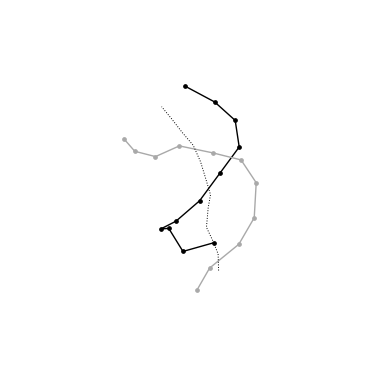

In [31]:
nuc = mdna.load(traj)
nuc.describe()
nuc.draw()#triads=False,lw=5, helical_axis=True,markersize=10)

Random sequence: GTTTGCTGTGGTTATTGGTCTGTCGGAAATCTAAGGTTCAATGGCGTGACTTCTCGGACTGGACTTTTGAAGGATCGGGGCTACTTTGCTAGGTCCCCGT 


Start rescaling spline based on requested number of base pairs.
	This requires recomputation of the control points to match the desired number of base pairs.
	Spline scaled to match the target number of base pairs: 100

Structure is requested to be circular:
	Excess twist per base to make ends meet: 1.71 degrees
	New twist angle per base pair: 36.0 

Adjusting twist angles to match the given Delta linking number: -5
	Current twist number: 10.00
	Old twist angle per base pair: 36.00 degrees
	Adjusted twist angle per base pair: 18.00 degrees



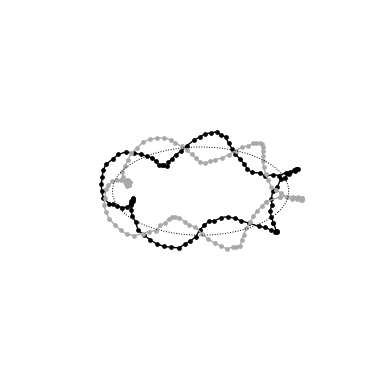

In [4]:
shape = mdna.Shapes.circle(10)
nuc = mdna.make(control_points=shape, n_bp=100, closed=True, dLk=5)
nuc.draw()

In [6]:
nuc.frames.shape

(100, 1, 4, 3)

Random sequence: AGGAGAGTTCGAGCTCCACGAGGTGATAGTTGATCACGAATTCTTGCATCACCCCAACGCCCATACGCCACCGACTTCACTGTAACAACTCTTCAATTGCAGTGTGCGCGGGGCAGCTCTGTATGTGGTACCACCACTCCAAAATGTCCAAGTGCCATTGTCCTCAATCGACTCCATCGGGCTCTTTGGCCACCATATTCACAGAGGCCTAGAAGGACCTGTATGTATTTGCCACGCTACCTGTCCAACCCTGGCCACTTATAATTGTTTAGAATATCGATGGTGTCCCTAGCGCTCAGTATAAGCAAGGCGTAG 


Start rescaling spline based on requested number of base pairs.
	This requires recomputation of the control points to match the desired number of base pairs.
	Spline scaled to match the target number of base pairs: 315

Structure is requested to be circular:
	Excess twist per base to make ends meet: 0.00 degrees
	New twist angle per base pair: 34.29 

Adjusting twist angles to match the given Delta linking number: 5
	Current twist number: 30.00
	Old twist angle per base pair: 34.29 degrees
	Adjusted twist angle per base pair: 40.00 degrees



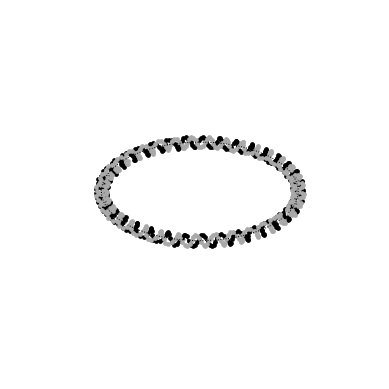

In [3]:
shape = mdna.Shapes.circle(10)
nuc = mdna.make(control_points=shape,n_bp=315,closed=True,dLk=5)
nuc.draw()
nuc.minimize(equilibrate_writhe=False,simple=False,exvol_rad=0.0, temp=300)
nuc.draw()

####################################
Initiating Excluded Volume...

######################################
#### INITIALIZING EXCLUDED VOLUME ####
######################################
 Excluded Volume Beads: 
   number of EV beads: 45
   bp per EV bead:     7
   Effective size:     3.57
   Exclusion distance: 4.0
######################################


ValueError: EVBeads: Overlap detected in intial configuration!

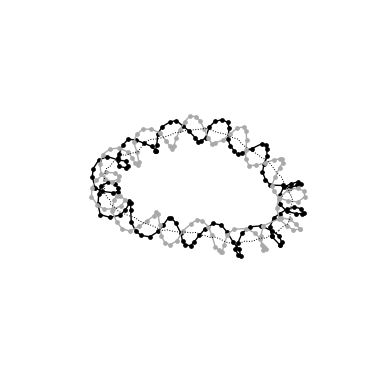

In [55]:
nuc.draw()


Start rescaling spline based on requested number of base pairs.
	This requires recomputation of the control points to match the desired number of base pairs.
	Spline scaled to match the target number of base pairs: 60

Structure is requested to be circular:
	Excess twist per base to make ends meet: 1.71 degrees
	New twist angle per base pair: 36.0 

Adjusting twist angles to match the given Delta linking number: -4
	Current twist number: 6.00
	Old twist angle per base pair: 36.00 degrees
	Adjusted twist angle per base pair: 12.00 degrees

Random sequence: ATCCAGCGCCTATGGACGCCCTATAGTATTGCGGCGGAGGTCTCTTAGACACTCTATCAG 


Start rescaling spline based on requested number of base pairs.
	This requires recomputation of the control points to match the desired number of base pairs.
	Spline scaled to match the target number of base pairs: 120

Structure is requested to be circular:
	Excess twist per base to make ends meet: 1.71 degrees
	New twist angle per base pair: 36.0 

Adjusting twist angl

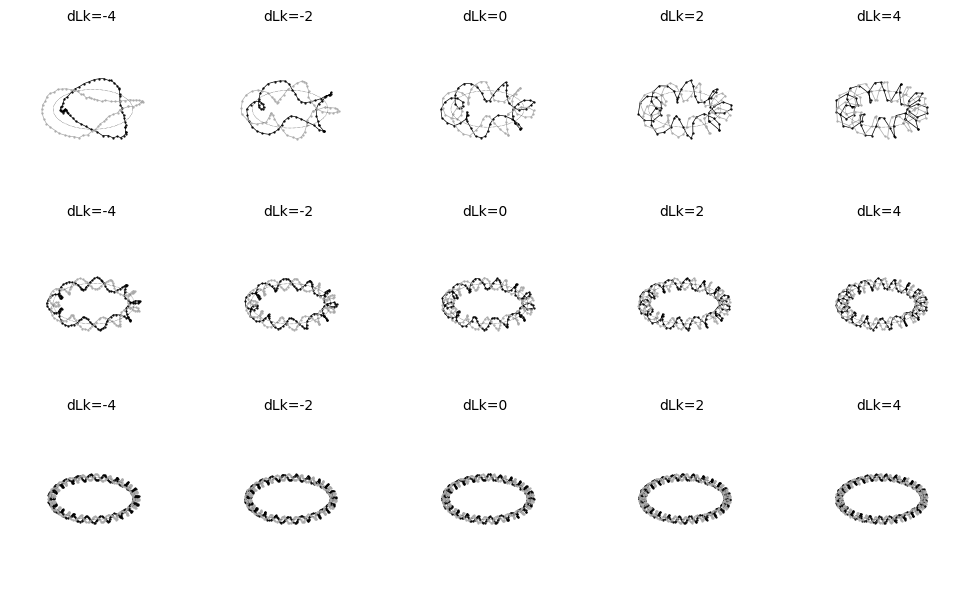

In [219]:
lk = [-4,-2,0,2,4]
size = [60,120,240]
n = 2
fig, ax = plt.subplots( len(size),len(lk), figsize=(len(lk)*n,len(size)*n), subplot_kw={'projection': '3d'})

_ = 0
for i,l in enumerate(lk):
    for j,s in enumerate(size):
        # control_points = mdna.Shapes.circle(radius=2)
        spline = mdna.SplineFrames(control_points,nbp=s,dLk=l,closed=True)
        nuc = mdna.load(frames=spline.frames)
        nuc.draw(ax=ax[j][i],lw=0.5,markersize=0.5)
        ax[j][i].set_title(f'dLk={l}',fontsize=10)
        _ += 1

fig.tight_layout()


Start rescaling spline based on requested number of base pairs.
	This requires recomputation of the control points to match the desired number of base pairs.
	Spline scaled to match the target number of base pairs: 60

Structure is requested to be circular:
	Excess twist per base to make ends meet: 1.71 degrees
	New twist angle per base pair: 36.0 

Adjusting twist angles to match the given Delta linking number: -4
	Current twist number: 6.00
	Old twist angle per base pair: 36.00 degrees
	Adjusted twist angle per base pair: 12.00 degrees

Random sequence: ACCCCCCGCGGAAGTCGATGACAATGGTGAAGCATTACAAGCGCCGTAGCTTTAATCGTT 


Start rescaling spline based on requested number of base pairs.
	This requires recomputation of the control points to match the desired number of base pairs.
	Spline scaled to match the target number of base pairs: 60

Structure is requested to be circular:
	Excess twist per base to make ends meet: 1.71 degrees
	New twist angle per base pair: 36.0 

Adjusting twist angle

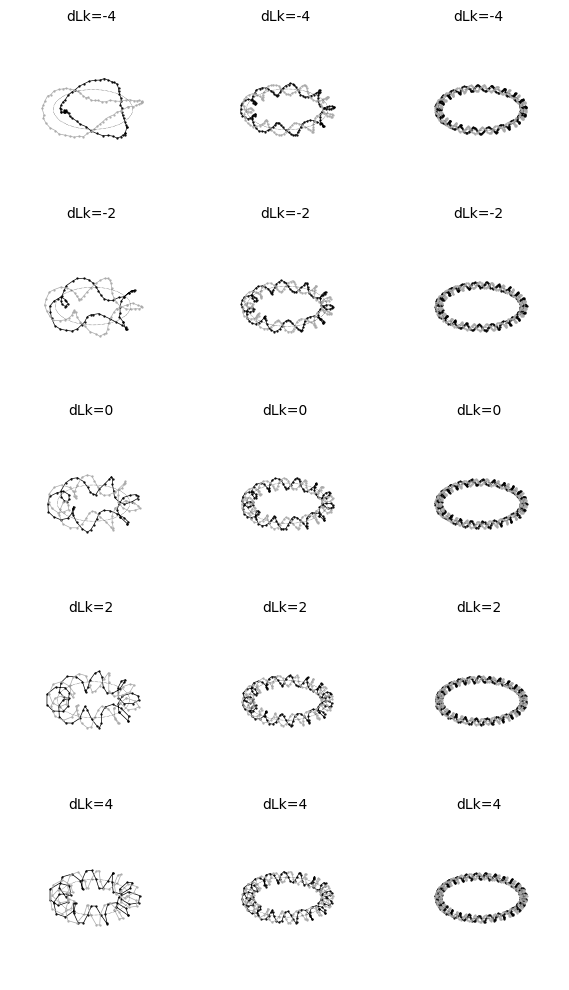

In [220]:
lk = [-4,-2,0,2,4]
size = [60,120,240]
n = 2
fig, ax = plt.subplots(len(lk),  len(size),figsize=(len(size)*n,len(lk)*n), subplot_kw={'projection': '3d'})

_ = 0
for i,s in enumerate(size):
    for j,l in enumerate(lk):
        # control_points = mdna.Shapes.circle(radius=2)
        spline = mdna.SplineFrames(control_points,nbp=s,dLk=l,closed=True)
        nuc = mdna.load(frames=spline.frames)
        nuc.draw(ax=ax[j][i],lw=0.5,markersize=0.5)
        ax[j][i].set_title(f'dLk={l}',fontsize=10)
        _ += 1

fig.tight_layout()

In [180]:
control_points = np.array([[0,0,0],[0,1,0],[0,2,0],[0,3,4]])*5
control_points = mdna.Shapes.circle(radius=2)
spline = mdna.SplineFrames(control_points,nbp=100,dLk=0,closed=True)


nuc = mdna.load(frames=spline.frames)
nuc.describe()




Start rescaling spline based on requested number of base pairs.
	This requires recomputation of the control points to match the desired number of base pairs.
	Spline scaled to match the target number of base pairs: 100

Structure is requested to be circular:
	Excess twist per base to make ends meet: 1.71 degrees
	New twist angle per base pair: 36.0 

Adjusting twist angles to match the given Delta linking number: -5
	Current twist number: 10.00
	Old twist angle per base pair: 36.00 degrees
	Adjusted twist angle per base pair: 18.00 degrees

Random sequence: GGCCATTATGAGTATATGTCAGCGTACTAGTACGATGGTTTGGCTAGCCGACATACTCACCGGCTATTCCAGGGCCTGGCGCTCTGCGAACCTCTGACTA 

Circular DNA structure with 100 base pairs
Sequence: GGCCATTATGAGTATATGTCAGCGTACTAGTACGATGGTTTGGCTAGCCGACATACTCACCGGCTATTCCAGGGCCTGGCGCTCTGCGAACCTCTGACTA
Trajectory not loaded
Frames:  (100, 1, 4, 3)


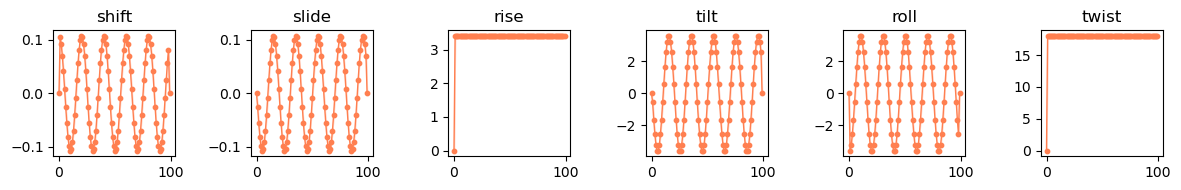

In [202]:
rigid = nuc.get_rigid_parameters()
fig, ax = rigid.plot_parameters(step=True,base=False)


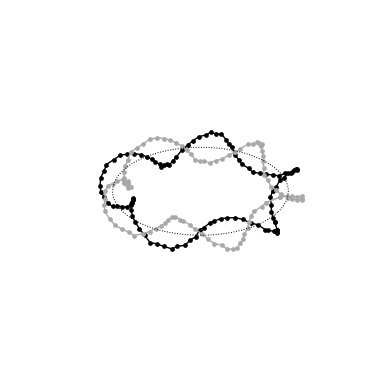

In [205]:
nuc.draw(triads=False,backbone=True)

<mdtraj.Trajectory with 1 frames, 4914 atoms, 240 residues, without unitcells>
(120, 4, 3)


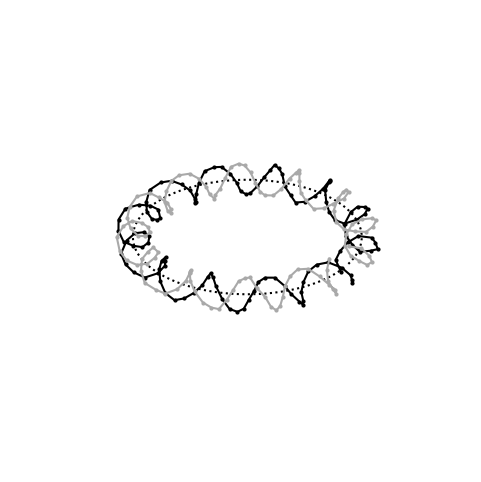

In [20]:
nuc.draw()


Start rescaling spline based on requested number of base pairs.
	This requires recomputation of the control points to match the desired number of base pairs.
	Spline scaled to match the target number of base pairs: 120

Adjusting twist angles to match the given Delta linking number: -3
	Current twist number: 11.43
	Old twist angle per base pair: 34.29 degrees
	Adjusted twist angle per base pair: 25.29 degrees

Sequence: AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
Number of base pairs: 120
<mdtraj.Trajectory with 1 frames, 4914 atoms, 240 residues, without unitcells>
(120, 4, 3)


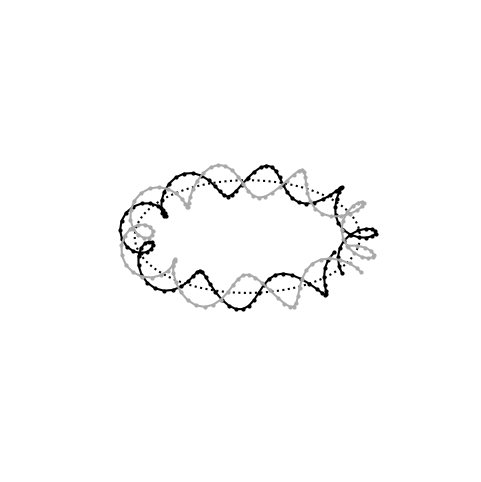

In [3]:
control_points = np.array([[0,0,0],[0,1,0],[0,2,0],[0,3,4]])*5
control_points = mdna.Shapes.circle(radius=2)
spline = mdna.SplineFrames(control_points,nbp=120,dLk=-3)
frames = spline.frames
nuc = mdna.load(frames=frames,sequence=''.join(['A']*len(frames)))
nuc.n_bp, nuc.sequence
nuc.draw()

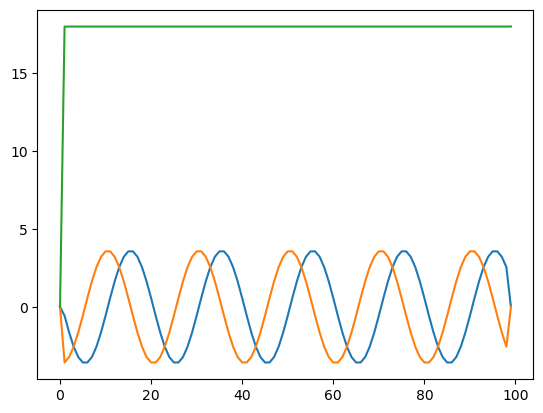

In [179]:
%matplotlib inline  
plt.plot(rigid.get_parameter('tilt')[0])  
plt.plot(rigid.get_parameter('roll')[0])
plt.plot(rigid.get_parameter('twist')[0])
plt.show()

(12, 2001, 4, 3)
(12, 3)


(1.7312086820602417,
 6.1697918176651,
 4.212208867073059,
 8.650792002677917,
 0.09106272459030151,
 3.4200000762939453)

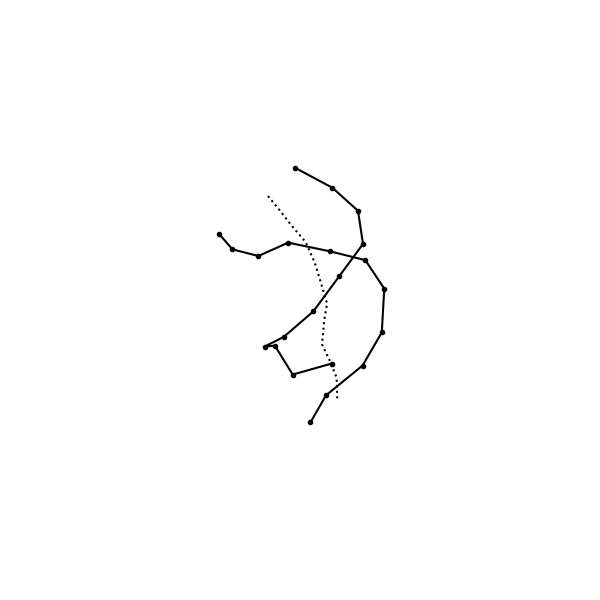

In [37]:
%matplotlib ipympl
phosphor_A  = traj.top.select('name P and chainid 0')
phosphor_B  = traj.top.select('name P and chainid 1')

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')

frames = nuc.mean_reference_frames
print(frames.shape)
helical_axis = frames[:,0,0]
print(helical_axis.shape)
ax.plot(helical_axis[:,0],helical_axis[:,1],helical_axis[:,2],':',c='k',markersize=5)

ax.plot(traj.xyz[0,phosphor_A,0],traj.xyz[0,phosphor_A,1],traj.xyz[0,phosphor_A,2],'-o',c='k',markersize=3)
ax.plot(traj.xyz[0,phosphor_B,0],traj.xyz[0,phosphor_B,1],traj.xyz[0,phosphor_B,2],'-o',c='k',markersize=3)
ax.axis('equal')
ax.axis('off')

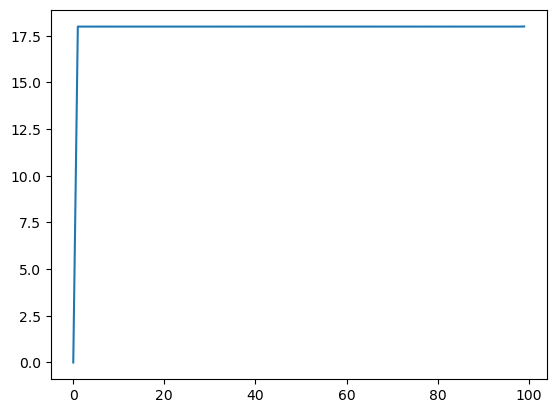